# Types of Unsupervised Learning

In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp
print("scipy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import matplotlib.pyplot as plt
from IPython import display
import mglearn

Python version: 3.7.0 (default, Aug 22 2018, 15:22:33) 
[Clang 9.1.0 (clang-902.0.39.2)]
pandas version: 0.23.4
matplotlib version: 2.2.3
numpy version: 1.15.1
scipy version: 1.1.0
IPython version: 6.5.0
scikit-learn version: 0.19.2


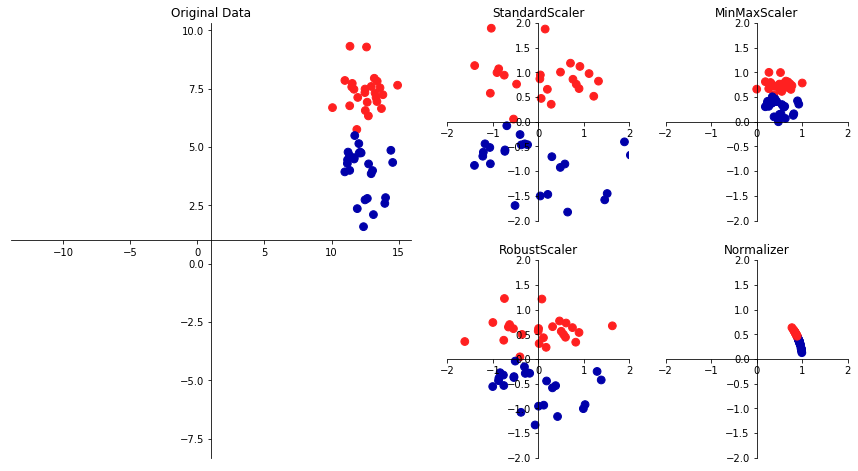

In [7]:
# various scales of data
mglearn.plots.plot_scaling()

* Standard Scaler : 각 특성의 평균을 0, 분산을 1로 정규화
* MinMax Scaler : 모든 특성이 0과 1사이에 위치하도록 변환
* Robust Scaler : 중간값(median)과 사분위 값(quartile)을 사용해 정규화
* Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정 (데이터의 방향, 각도가 중요할 때 많이 사용)

In [8]:
# apply data process to cancer example ( SVM, MinMaxScaler)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
# transform data
x_train_scaled = scaler.transform(x_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력
print("변환된 후 크기: {}".format(x_train_scaled.shape))
print("스케일 조정 전 특성별 최솟값:\n{}".format(x_train.min(axis=0)))
print("스케일 조정 전 특성별 최댓값:\n{}".format(x_train.max(axis=0)))
print("스케일 조정 후 특성별 최솟값:\n{}".format(x_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값:\n{}".format(x_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최솟값:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
# transform test data
x_test_scaled = scaler.transform(x_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력
print("스케일 조정 후 특성별 최솟값:\n{}".format(x_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값:\n{}".format(x_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최솟값:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


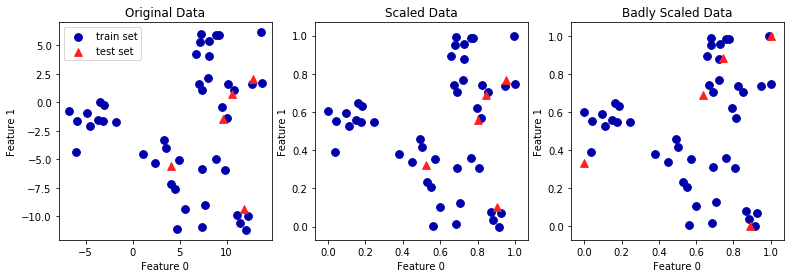

In [18]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
x, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 분할
x_train, x_test = train_test_split(x, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(x_train[:, 0], x_train[:, 1], c=mglearn.cm2(0), label="train set", s=60)
axes[0].scatter(x_test[:, 0], x_test[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# apply MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 스케일이 조정된 데이터의 산점도
axes[1].scatter(x_train_scaled[:, 0], x_train_scaled[:, 1], c=mglearn.cm2(0), label="train set", s=60)
axes[1].scatter(x_test_scaled[:, 0], x_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[1].set_title("Scaled Data")

# 테스트 세트의 스케일을 따로 조정
# 테스트 세트의 최솟값은 0, 최댓값은 1
# Just for Example. Never use it like this
test_scaler = MinMaxScaler()
test_scaler.fit(x_test)
x_test_scaled_badly = test_scaler.transform(x_test)

# 잘못 조정된 데이터의 산점도
axes[2].scatter(x_train_scaled[:, 0], x_train_scaled[:, 1], c=mglearn.cm2(0), label="train set", s=60)
axes[2].scatter(x_test_scaled_badly[:, 0], x_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Badly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")